In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')
fall_detection = pd.read_csv(r'/content/drive/MyDrive/ML-Architect/fall_detection.csv')
fall_detection.info()
fall_detection.head(5)

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ACTIVITY     16382 non-null  int64  
 1   TIME         16382 non-null  float64
 2   SL           16382 non-null  float64
 3   EEG          16382 non-null  float64
 4   BP           16382 non-null  int64  
 5   HR           16382 non-null  int64  
 6   CIRCLUATION  16382 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [3]:
hr_df = fall_detection[fall_detection['ACTIVITY'] == 5]
hr_df['HR'].mean()

192.72156398104266

In [4]:
fall_detection['ACTIVITY'].unique()

array([3, 2, 4, 5, 0, 1])

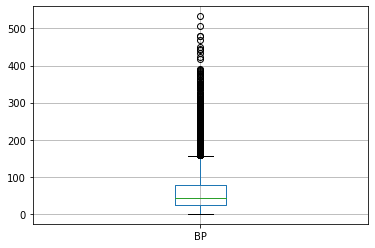

In [5]:
fall_detection.boxplot('BP')

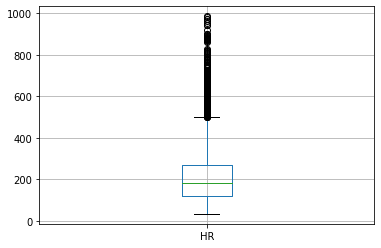

In [6]:
fall_detection.boxplot('HR')

In [7]:
data = fall_detection.copy()
data.iloc[:, 1:7] = StandardScaler().fit_transform(data.iloc[:, 1:7])
X_train, X_test, y_train, y_test = train_test_split(data, data['ACTIVITY'], test_size = 0.3, random_state=42)
X_train = X_train.drop(columns=['ACTIVITY'])
X_test = X_test.drop(columns=['ACTIVITY'])

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.37965412004069177

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.6807731434384537

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 50,random_state=42)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.7688708036622584

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.2, max_features=6, max_depth = 5, random_state = 42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_score(y_test, y_pred_gb)

0.7320447609359105

In [17]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.40203458799593084

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)
y_pred_knn = clf_KNN.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.6380467955239064

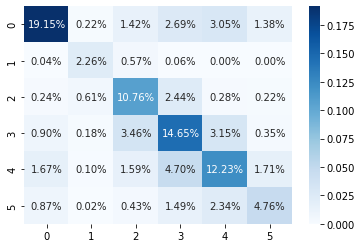

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn

confusion = confusion_matrix(y_test, y_pred_knn)
seaborn.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')

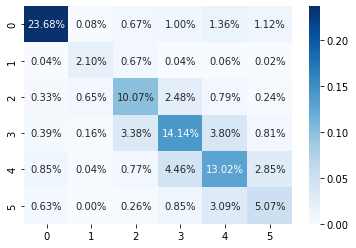

In [21]:
confusion = confusion_matrix(y_test, y_pred_dt)
seaborn.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')

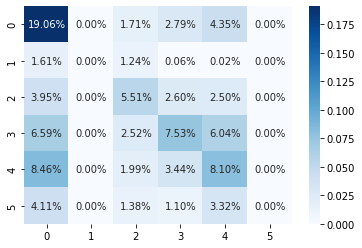

In [22]:
confusion = confusion_matrix(y_test, y_pred_svm)
seaborn.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')

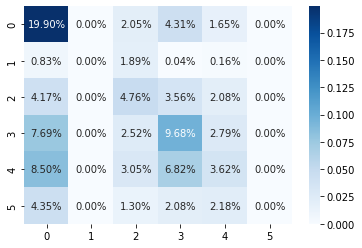

In [23]:
confusion = confusion_matrix(y_test, y_pred_lr)
seaborn.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')